In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import pearsonr

import IPython

sns.set(color_codes=True)
plt.style.use('seaborn')

# Expectation of predicted influence vs actual influence

- For each random seed s
  - Train CNN from scratch with seed s
  - Get test loss of fixed test example j
  - Predict influence for each test example i
  - For each train example i to remove
    - Retrain for a few iterations with i excluded
    - Get new test loss of fixed test example j
    - Calculate difference in these test losses

In [2]:
f = np.load('../output/mnist_influence_expectations_cnn.npz')
actual_loss_diffs = f['all_actual_loss_diffs']
predicted_loss_diffs = f['all_predicted_loss_diffs']
indices_to_remove = f['indices_to_remove']

print("Actual loss diffs:", np.mean(actual_loss_diffs, axis=0))
print("Std of actual loss diffs:", np.std(actual_loss_diffs, axis=0))
print("Predicted loss diffs:", np.mean(predicted_loss_diffs, axis=0))

Actual loss diffs: [ 0.00046071 -0.00362148 -0.00333534 -0.0010844  -0.00208228]
Std of actual loss diffs: [0.00075373 0.00263266 0.00256144 0.00206672 0.00271164]
Predicted loss diffs: [-0.00206689 -0.00061363  0.00104169  0.00340366  0.00011122]


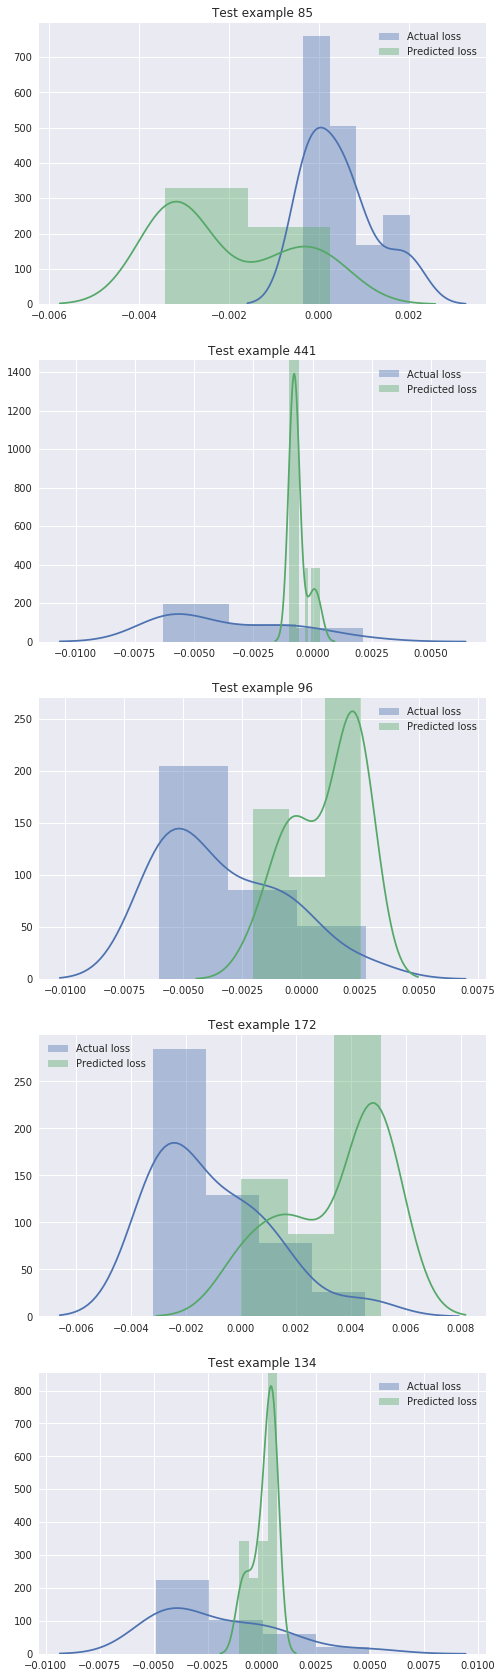

In [3]:
N = len(indices_to_remove)
fig, axs = plt.subplots(N, 1, figsize=(8, 6 * N))
for i, idx_to_remove in enumerate(indices_to_remove):
    sns.distplot(actual_loss_diffs[:, i], label='Actual loss', ax=axs[i])
    sns.distplot(predicted_loss_diffs[:, i], label='Predicted loss', ax=axs[i])
    axs[i].legend()
    axs[i].set_title("Test example {}".format(idx_to_remove))